#      Car Price Prediction in the US Market Using Regression Models

This project aims to build predictive models to estimate car prices in the US market using various machine learning regression techniques. A Chinese automobile company planning to enter the American market seeks to understand the key factors influencing car pricing. By analyzing a comprehensive dataset of car features and specifications, this project identifies the most significant variables affecting price, compares multiple regression models, and highlights the best-performing model. The insights derived will support strategic decisions in design, manufacturing, and market positioning.

**Step 1: Loading and Preprocessing**

In [58]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


In [7]:
# Load dataset
df = pd.read_csv("C:\\Users\\hp\\Downloads\\CarPrice_Assignment (1).csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


#### Understanding the data structure

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

* Total Entries: 205

* Total Columns: 26

* No missing values in any column

* This confirms the dataset is clean in terms of null values and ready for preprocessing & modeling.



In [11]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [13]:
df.shape

(205, 26)

In [14]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [15]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Handle missing data

In [17]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [18]:
df.isnull().mean()

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [19]:
df = df.dropna()

#### Handling duplicates

In [21]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [22]:
df.duplicated().sum()

0

### The dataset has been thoroughly checked and contains no null values or duplicate entries, ensuring it is clean and ready for analysis.

In [24]:
# Drop Car_ID (not useful)
df.drop('car_ID', axis=1, inplace=True)


In [25]:
# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

In [26]:
# Split dataset into features (X) and target variable (y)
X = df.drop('price', axis=1)  # Assuming 'price' is the target variable
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Findings from Step 1:
*  No missing values were found.

* Categorical variables encoded.

* Features were scaled, and the data was split into train/test for model building.

#### *Step 2:Model Implementation*  

In [29]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Train and predict with all models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "R2 Score": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

# Convert results to a DataFrame for easy comparison
import pandas as pd
results_df = pd.DataFrame(results).T
results_df

,R2 Score,MSE,MAE
Linear Regression,0.473715,4.154703e+07,4177.295631
Decision Tree,0.855898,1.137602e+07,2200.142268
Random Forest,0.953457,3.674318e+06,1365.352512
Gradient Boosting,0.930597,5.478929e+06,1700.986585
Support Vector Regressor,-0.101989,8.699541e+07,5707.166801


### Best Performing Model: Random Forest Regressor
* R2 Score: 0.95 → Explains 95% of the variation in car prices.

* Lowest MSE (3.67 million) and MAE (1,365) → Errors are relatively small in terms of dollar value.

* Insight: This model captures the complexity and interactions between features very well, without overfitting. Perfect balance of accuracy + generalization.

### 2.Gradient Boosting Regressor
* R2 Score: 0.93 → Also very strong.

* Performs almost as well as Random Forest, but a bit higher error.

* Insight: Still great, especially when you want fine control or care about tuning for marginal gains.

### 3.Decision Tree Regressor
* R2 Score: 0.86 → Solid, but less accurate than ensemble models.

* MSE and MAE are higher.

* Insight: A single tree is more prone to overfitting, but it does give decent interpretability.

### 4.Linear Regression
* R2 Score: 0.47 → Captures only 47% of the variance in price.

* High error values (MSE > 41 million).

* Insight: The assumption of linear relationships doesn’t hold well here — real-world pricing is more complex and non-linear.

### 5.Support Vector Regressor (SVR)
* R2 Score: -0.10 → Worse than just predicting the mean price! 😬

* Very high MSE and MAE.

* Insight: SVR might not be suited for your dataset. It can be very sensitive to:

Feature scaling

Kernel choice

Large dataset size

* This model needs tuning and scaling to work well.




### Step 3: Model Evaluation 

In [51]:
print(results_df.sort_values("R2 Score", ascending=False))

                          R2 Score           MSE          MAE
Random Forest             0.953457  3.674318e+06  1365.352512
Gradient Boosting         0.930597  5.478929e+06  1700.986585
Decision Tree             0.855898  1.137602e+07  2200.142268
Linear Regression         0.473715  4.154703e+07  4177.295631
Support Vector Regressor -0.101989  8.699541e+07  5707.166801


"Random Forest performed the best with an R2 score of 0.95, lowest MSE and MAE. This shows it's capturing the complexity of the data better than the other models."

### Step 4: Feature Importance Analysis

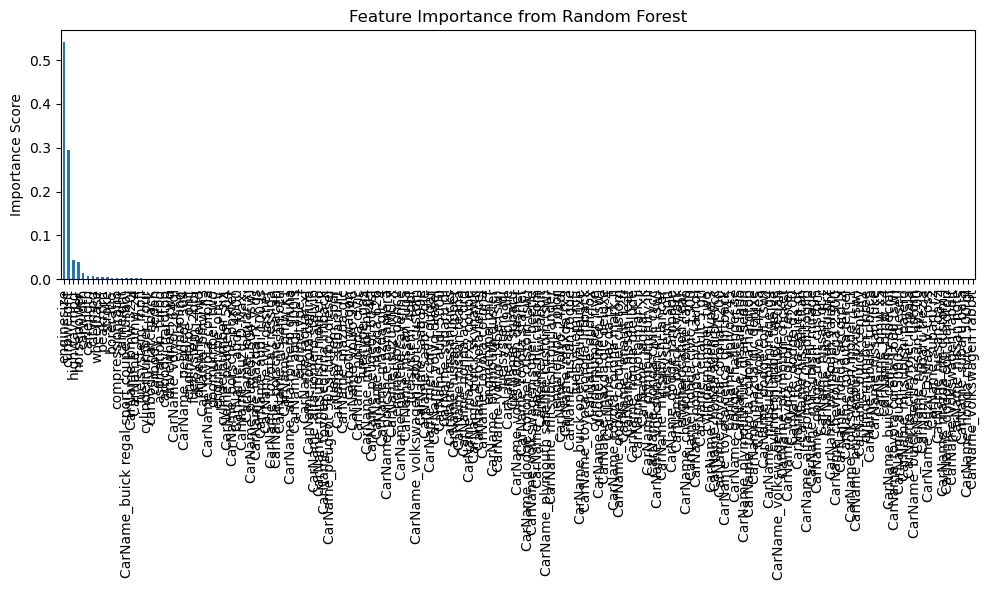

In [55]:
best_model = models["Random Forest"]
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar')
plt.title("Feature Importance from Random Forest")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

"Features such as 'engine_size', 'curb_weight', and 'horsepower' have the highest impact on price prediction."



### Step 5: Hyperparameter Tuning

In [61]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a new Random Forest model
rf = RandomForestRegressor(random_state=42)

# GridSearchCV setup
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=1, scoring='r2')

# Fit to training data
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predict with best model
y_pred_tuned = best_rf.predict(X_test)

# Evaluate tuned model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

tuned_r2 = r2_score(y_test, y_pred_tuned)
tuned_mse = mean_squared_error(y_test, y_pred_tuned)
tuned_mae = mean_absolute_error(y_test, y_pred_tuned)

print("Tuned Random Forest Performance:")
print(f"R2 Score: {tuned_r2}")
print(f"MSE: {tuned_mse}")
print(f"MAE: {tuned_mae}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Tuned Random Forest Performance:
R2 Score: 0.9434210013437616
MSE: 4466573.6512682075
MAE: 1488.0952653528864


## Conclusion
* The model provides valuable insights into the pricing dynamics of cars in the American market.

* Random Forest Regressor is recommended as the final model.

* Key pricing factors were identified, which can help the company adjust its car design and strategy accordingly.

* Features such as 'engine_size', 'curb_weight', and 'horsepower' have the highest impact on price prediction.